In [1]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
data_path = "../output_1211/L2P_Prob_only_global/train/client_1"
proposed_test_embedding = torch.load(os.path.join(data_path, 'embedding_after_classifier_round_250.pt'))
label = torch.load(os.path.join(data_path, 'label_round_250.pt'))

In [4]:
data_path = "../output_1211/missing_aware/train/client_1"
missing_test_embedding = torch.load(os.path.join(data_path, 'embedding_before_classifier_round_250.pt'))
miss_label = torch.load(os.path.join(data_path, 'label_round_250.pt'))

In [5]:
label==miss_label

False

In [6]:
from collections import Counter
# Count occurrences of each element
element_counts = Counter(label)
element_counts_miss = Counter(miss_label)


print(element_counts, element_counts_miss)
element_counts == element_counts_miss


Counter({1: 32, 3: 32, 0: 32, 2: 32, 4: 32, 5: 30, 7: 30, 6: 29}) Counter({3: 32, 1: 32, 0: 32, 2: 32, 4: 32, 7: 30, 5: 30, 6: 29})


True

In [7]:
label[:5], miss_label[:5]

([1, 1, 3, 1, 0], [3, 7, 1, 7, 6])

In [8]:
tsne = TSNE(n_components=2)
transformed_proposed_embed = tsne.fit_transform(proposed_test_embedding.numpy())

In [9]:
transformed_proposed_embed.shape

(249, 2)

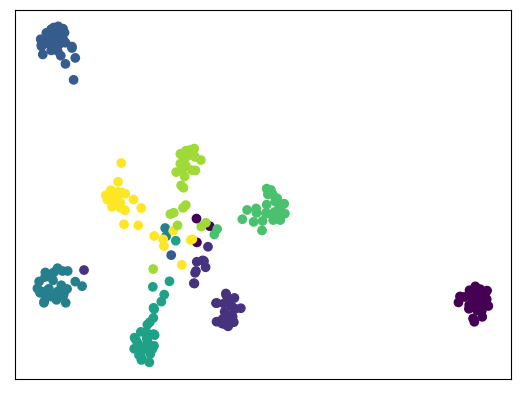

In [10]:
scatter = plt.scatter(transformed_proposed_embed[:, 0], transformed_proposed_embed[:, 1], c=label)
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
data_path = "../output_1211/missing_aware/train/client_1"
missing_test_embedding = torch.load(os.path.join(data_path, 'embedding_before_classifier_round_250.pt'))
miss_label = torch.load(os.path.join(data_path, 'label_round_250.pt'))

In [13]:
tsne = TSNE(n_components=2)
transformed_missing_embed = tsne.fit_transform(missing_test_embedding.numpy())

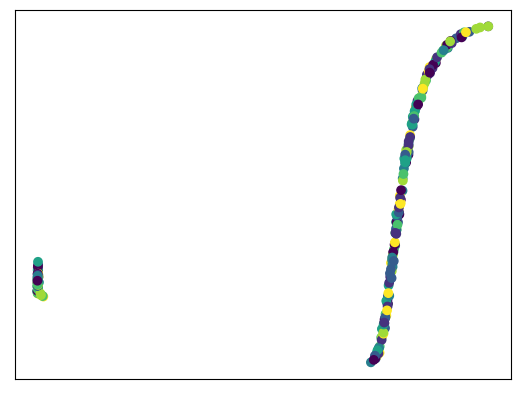

In [14]:
scatter = plt.scatter(missing_test_embedding[:, 0], transformed_missing_embed[:, 1], c=miss_label)
plt.xticks([])
plt.yticks([])
plt.show()